# tokenization

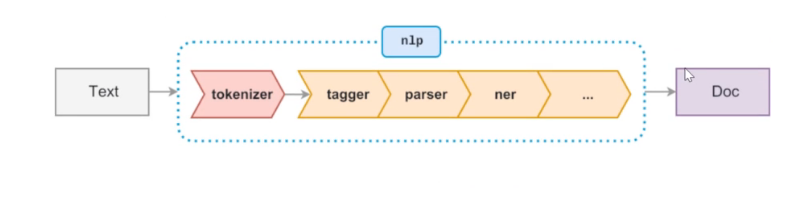

In [1]:
import spacy 

In [2]:
nlp= spacy.load('en_core_web_sm')

In [5]:
help(nlp)

Help on English in module spacy.lang.en object:

class English(spacy.language.Language)
 |  English(vocab=True, make_doc=True, max_length=1000000, meta={}, **kwargs)
 |  
 |  A text-processing pipeline. Usually you'll load this once per process,
 |  and pass the instance around your application.
 |  
 |  Defaults (class): Settings, data and factory methods for creating the `nlp`
 |      object and processing pipeline.
 |  lang (unicode): Two-letter language ID, i.e. ISO code.
 |  
 |  DOCS: https://spacy.io/api/language
 |  
 |  Method resolution order:
 |      English
 |      spacy.language.Language
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  Defaults = <class 'spacy.lang.en.EnglishDefaults'>
 |  
 |  
 |  lang = 'en'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from spacy.language.Language:
 |  
 |  __call__(self, text, disable=[], component_cfg=None)
 |      Apply the pipeline to some text

In [10]:
text = 'Apple is loooking for  buying  a . U.K. startup  for $1 billion'

In [11]:
doc = nlp(text)

In [12]:
for token in doc:
    print(token.text)

Apple
is
loooking
for
 
buying
 
a
.
U.K.
startup
 
for
$
1
billion


In [13]:
# here $ and 1 are separate 
# spacy automatically finds out the extra dot and a  dot with a work like u.k , and can detremine whetehr it  needs to be separate 
# or not 

In [14]:
doc

Apple is loooking for  buying  a . U.K. startup  for $1 billion

# parts of speech tagging

In [16]:
for token in doc :
    print(token.text , '  ',token.pos_)

Apple    PROPN
is    AUX
loooking    VERB
for    ADP
     SPACE
buying    NOUN
     SPACE
a    DET
.    PUNCT
U.K.    PROPN
startup    NOUN
     SPACE
for    ADP
$    SYM
1    NUM
billion    NUM


# dependency visualization

In [17]:
from spacy import displacy

In [18]:
doc

Apple is loooking for  buying  a . U.K. startup  for $1 billion

In [29]:
displacy.render(doc,style='dep',options={'distance':100,'compact':True})

# named entity recognition

In [30]:
for ent in doc.ents:
    print(ent.text,ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [31]:
displacy.render(doc,style='ent')

In [35]:
doc = nlp('Apple is looking for  buying  a  UK  startup , for  $1 billion in  2020')
displacy.render(doc,style='ent')

# sentence segmentation

In [47]:
text = 'Apple is looking for  buying  a  UK  startup , for  $1 billion in  2020. Government has  given permission to build.'

In [48]:
doc=nlp(text)

In [49]:
doc

Apple is looking for  buying  a  UK  startup , for  $1 billion in  2020. Government has  given permission to build.

In [50]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
UK GPE
$1 billion MONEY
2020 DATE


In [51]:
displacy.render(doc,style='ent')

In [52]:
# print the sentences 

for  sent in doc.sents:
    print(sent)

Apple is looking for  buying  a  UK  startup , for  $1 billion in  2020.
Government has  given permission to build.


#  Rule based  phrase matching

In [3]:
from spacy.matcher import Matcher 
from spacy.tokens import  Span 

In [4]:
text = 'Hello, world! hello world'

In [5]:
doc=nlp(text)

In [6]:
doc

Hello, world! hello world

In [7]:
for token  in doc :
    print(token)

Hello
,
world
!
hello
world


In [8]:
#pattern = [{'LOWER': 'hello'}, {'IS_PUNCT': True, 'OP': '?'}, {'LOWER': 'world'}]
pattern = [{'LOWER': 'hello'}, {'IS_PUNCT': True}, {'LOWER': 'world'}]

In [9]:
matcher = Matcher(nlp.vocab)
matcher.add('hw',None,pattern)##here hw is just the id nothing else 

In [10]:
matches=matcher(doc)

In [11]:
matches

[(17790654416186116455, 0, 3)]

In [12]:
# so , there are 2  matches , hence now lets try to find out where excatly the match lies 
for match_id , start , end in matches :
    string_id = nlp.vocab.strings[match_id]##this determines the rancom id generated for hw 
    span = doc[start:end]
    print(match_id  , string_id , '-!-',span,'-',start , '-',end,'-' ,span.text)

17790654416186116455 hw -!- Hello, world - 0 - 3 - Hello, world


In [14]:
doc

Hello, world! hello world

In [15]:
## now change the pattern 

pattern_1=[{'LOWER':'hello'},{'IS_PUNCT':False, 'OP':'?'},{'LOWER':'world'}]

In [20]:
matcher_1=Matcher(nlp.vocab)
matcher_1.add('Optional_id',None,pattern_1)
matches_1=matcher_1(doc)

In [21]:
matches_1=matcher_1(doc)

In [22]:
matches_1

[(16199812278639629166, 4, 6)]

In [23]:
for match_id , start , end in matches_1:
    string_id = nlp.vocab.strings[match_id]
    span=doc[start:end]
    print(match_id,string_id,'--', span ,'--',start , '--',end,'--',span.text )

16199812278639629166 Optional_id -- hello world -- 4 -- 6 -- hello world


In [25]:
## now change the pattern 

pattern_2=[{'LOWER':'hello'},{'IS_PUNCT':True, 'OP':'?'},{'LOWER':'world'}]

In [26]:
matcher_2=Matcher(nlp.vocab)
matcher_2.add('Optional_id2',None,pattern_2)
matches_2=matcher_2(doc)

In [27]:
matches_2

[(12107525452411070429, 0, 3), (12107525452411070429, 4, 6)]

In [28]:
for match_id , start , end in matches_2:
    string_id = nlp.vocab.strings[match_id]
    span =doc[start:end]
    print(match_id , string_id , '--',span ,'--',start,'--',end,'--',span.text)

12107525452411070429 Optional_id2 -- Hello, world -- 0 -- 3 -- Hello, world
12107525452411070429 Optional_id2 -- hello world -- 4 -- 6 -- hello world


# regular expression 

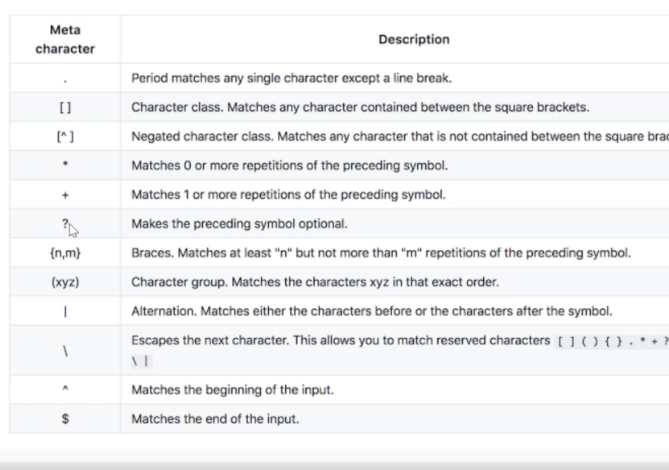

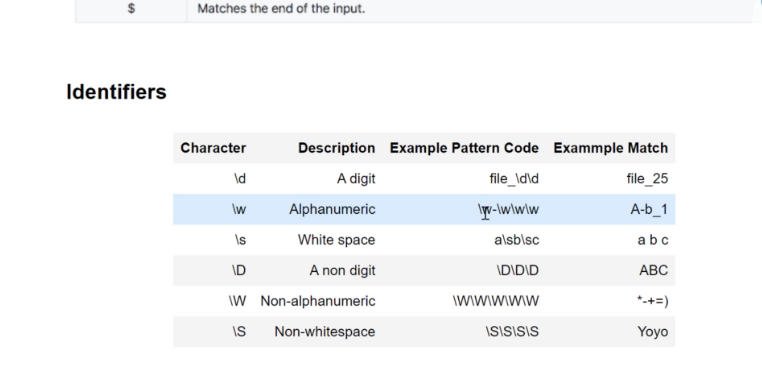

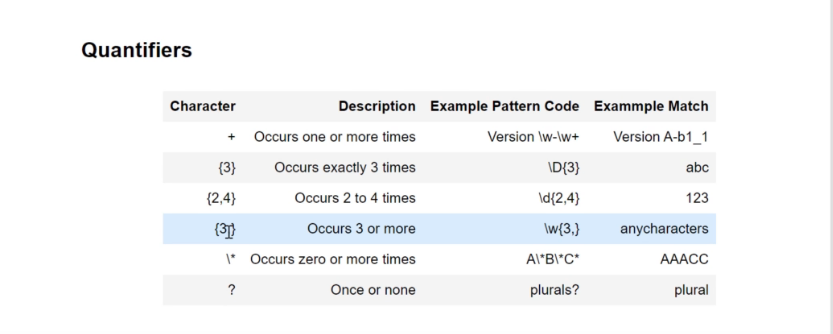

In [ ]:
#start of the line
^[a-z0-9_-]{3,15}$

In [3]:
text='my phone number is 123.ohh its wrong  one . correct one is 12345667. pls call me in your available time zone.'

In [4]:
import re 

In [6]:
re.search(r'\d{1,}',text)# match at least 3 digits 

<re.Match object; span=(19, 22), match='123'>

In [9]:
re.findall(r'\d{1,}',text)

['123', '12345667']

In [11]:
re.findall(r'\w',text)

['m',
 'y',
 'p',
 'h',
 'o',
 'n',
 'e',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 'i',
 's',
 '1',
 '2',
 '3',
 'o',
 'h',
 'h',
 'i',
 't',
 's',
 'w',
 'r',
 'o',
 'n',
 'g',
 'o',
 'n',
 'e',
 'c',
 'o',
 'r',
 'r',
 'e',
 'c',
 't',
 'o',
 'n',
 'e',
 'i',
 's',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '6',
 '7',
 'p',
 'l',
 's',
 'c',
 'a',
 'l',
 'l',
 'm',
 'e',
 'i',
 'n',
 'y',
 'o',
 'u',
 'r',
 'a',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 't',
 'i',
 'm',
 'e',
 'z',
 'o',
 'n',
 'e']

In [13]:
re.findall(r'\d+',text)

['123', '12345667']

In [15]:
re.findall(r'\w+',text)# find all the words 

['my',
 'phone',
 'number',
 'is',
 '123',
 'ohh',
 'its',
 'wrong',
 'one',
 'correct',
 'one',
 'is',
 '12345667',
 'pls',
 'call',
 'me',
 'in',
 'your',
 'available',
 'time',
 'zone']

# wildcard and exclusion matching 

In [17]:
re.findall(r'ph...',text)## here dot is a wild character 

['phone']

In [18]:
re.findall(r'ph......',text)

['phone nu']

In [19]:
re.findall(r'c...+',text)

['correct one is 12345667. pls call me in your available time zone.']

In [20]:
text

'my phone number is 123.ohh its wrong  one . correct one is 12345667. pls call me in your available time zone.'

In [22]:
re.findall(r'my.+',text)# dot + 

['my phone number is 123.ohh its wrong  one . correct one is 12345667. pls call me in your available time zone.']

In [24]:
re.findall(r'c.l',text)

['cal']

In [25]:
re.findall(r'2.',text)

['23', '23']

In [26]:
re.findall(r'2.+',text)

['23.ohh its wrong  one . correct one is 12345667. pls call me in your available time zone.']

In [27]:
re.findall(r'[^\d]',text)## print all the letters without digit 

['m',
 'y',
 ' ',
 'p',
 'h',
 'o',
 'n',
 'e',
 ' ',
 'n',
 'u',
 'm',
 'b',
 'e',
 'r',
 ' ',
 'i',
 's',
 ' ',
 '.',
 'o',
 'h',
 'h',
 ' ',
 'i',
 't',
 's',
 ' ',
 'w',
 'r',
 'o',
 'n',
 'g',
 ' ',
 ' ',
 'o',
 'n',
 'e',
 ' ',
 '.',
 ' ',
 'c',
 'o',
 'r',
 'r',
 'e',
 'c',
 't',
 ' ',
 'o',
 'n',
 'e',
 ' ',
 'i',
 's',
 ' ',
 '.',
 ' ',
 'p',
 'l',
 's',
 ' ',
 'c',
 'a',
 'l',
 'l',
 ' ',
 'm',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'y',
 'o',
 'u',
 'r',
 ' ',
 'a',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 't',
 'i',
 'm',
 'e',
 ' ',
 'z',
 'o',
 'n',
 'e',
 '.']

# print all the sentences without the digits 

In [28]:
re.findall(r'[^\d]+',text)## print all the sentences without the digits

['my phone number is ',
 '.ohh its wrong  one . correct one is ',
 '. pls call me in your available time zone.']

# another way of  printing sentences without digits 

In [31]:
re.findall(r'[\D]+',text)

['my phone number is ',
 '.ohh its wrong  one . correct one is ',
 '. pls call me in your available time zone.']

# printing ony the digits of the sentences 

In [32]:
re.findall(r'[^\D]+',text)

['123', '12345667']

# another way of printing only the digits 

In [35]:
re.findall(r'\d+',text)

['123', '12345667']